# Importing the libraries

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import datetime

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#word count
from collections import Counter

#word clouds
import heapq
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from tqdm import tqdm

#sentiment analysis
from textblob import TextBlob

#text preprocessing
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')

#hide warning
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Uploading files on google colab

In [ ]:
import zipfile
from google.colab import files
uploaded = files.upload()

Saving alone (1).csv to alone (1).csv
Saving fear.csv to fear.csv
Saving loveyourself.csv to loveyourself.csv
Saving mallet-2.0.8.zip to mallet-2.0.8.zip
Saving meditation.csv to meditation.csv
Saving mentalhealth.csv to mentalhealth.csv
Saving panic.csv to panic.csv
Saving positive.csv to positive.csv
Saving sadness (1).csv to sadness (1).csv
Saving sadness.csv to sadness.csv
Saving smile.csv to smile.csv
Saving stayhome.csv to stayhome.csv
Saving suicide.xlsx to suicide.xlsx


# Importing the dataset

In [ ]:
import io
df_fear = pd.read_csv(io.BytesIO(uploaded['fear.csv']))
df_alone = pd.read_csv(io.BytesIO(uploaded['alone (1).csv']))
df_meditation = pd.read_csv(io.BytesIO(uploaded['meditation.csv']))
df_panic = pd.read_csv(io.BytesIO(uploaded['panic.csv']))
df_suicide = pd.read_excel(io.BytesIO(uploaded['suicide.xlsx']))
df_sadness = pd.read_csv(io.BytesIO(uploaded['sadness.csv']))
df_smile= pd.read_csv(io.BytesIO(uploaded['smile.csv']))
df_stayhome= pd.read_csv(io.BytesIO(uploaded['stayhome.csv']))
df_positive= pd.read_csv(io.BytesIO(uploaded['positive.csv']))
df_mentalhealth= pd.read_csv(io.BytesIO(uploaded['mentalhealth.csv']))
df_loveyourself= pd.read_csv(io.BytesIO(uploaded['loveyourself.csv']))




In [ ]:
df_fear.head()


,User,Text,Date,Retweets,Favorites,HashTags,City
0,michaelbarata,New Blog Post: True Connection #love #connecti...,2020-07-11 16:29:35+00:00,0,0,#love #connection #fear #lawofattraction,NY
1,fvnclothing,What’s “scary” are the ppl who project their f...,2020-07-07 16:34:08+00:00,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,2020-07-07 02:34:40+00:00,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,2020-07-06 20:05:05+00:00,0,0,#bebitoblog #fear #theseuncertaintimes,NY
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,2020-06-30 12:05:40+00:00,3,2,#UnitedWeCan #citizens #communities #country #...,NY


In [ ]:
df_alone.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,_TraceDollFace_,Oh a reunion heyyy #Alone,2020-07-11 19:43:21+00:00,0,0,#Alone,NY
1,_TraceDollFace_,When we get down to the winner...I'm crying by...,2020-07-11 19:34:19+00:00,0,0,#Alone,NY
2,_TraceDollFace_,So now they pulling you if you're in danger of...,2020-07-11 19:31:32+00:00,0,2,#Alone,NY
3,_TraceDollFace_,3 people left. Day 74 #Alone,2020-07-11 18:42:48+00:00,0,2,#Alone,NY
4,_TraceDollFace_,Tireder isn't a word #Alone,2020-07-11 18:40:02+00:00,0,0,#Alone,NY


In [ ]:
df_fear.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,michaelbarata,New Blog Post: True Connection #love #connecti...,2020-07-11 16:29:35+00:00,0,0,#love #connection #fear #lawofattraction,NY
1,fvnclothing,What’s “scary” are the ppl who project their f...,2020-07-07 16:34:08+00:00,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,2020-07-07 02:34:40+00:00,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,2020-07-06 20:05:05+00:00,0,0,#bebitoblog #fear #theseuncertaintimes,NY
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,2020-06-30 12:05:40+00:00,3,2,#UnitedWeCan #citizens #communities #country #...,NY


In [ ]:
df_panic.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,Moosekj25,"Hey, so if Maxwell meets a premature end here ...",2020-07-10 13:34:46+00:00,0,0,#DeepStateCabal #PANIC,NY
1,fishonkikki,I hear ya. #badbussiness #gamestopfails @games...,2020-06-04 22:10:45+00:00,0,0,#badbussiness #gamestopfails #panic #preorders...,NY
2,Nikosak,#Police Sirens in the background. People hunke...,2020-06-02 03:25:18+00:00,0,1,#Police #panic #fear #pandemic #looters #Riote...,NY
3,Nikosak,NYC preparing for #Curfew. First time since #1...,2020-06-02 02:49:15+00:00,0,1,#Curfew #PANIC #Cuomo #BlackLivesMatter #Black...,NY
4,LaPerraShow,ARE YOU SERIOUS @realDonaldTrump?Is this the #...,2020-05-19 04:00:52+00:00,1,0,#best #FakeNews #TrumpAdministration #America ...,NY


In [ ]:
df_suicide.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,MamaAlboranista,#Repost goldenrulewill ・・・ via @lovewillam_ #R...,2020-07-10 17:56:18+00:00,0,2,#Repost #Repost #suicideawarness #suicide #dep...,NY
1,BelvyBenjamin,#ghislainemaxwell #epsteindidntkillhimself #je...,2020-07-08 21:26:43+00:00,0,0,#ghislainemaxwell #epsteindidntkillhimself #je...,NY
2,BelvyBenjamin,#ghislainemaxwell #footage #epsteined #epstein...,2020-07-06 15:12:57+00:00,0,0,#ghislainemaxwell #footage #epsteined #epstein...,NY
3,BelvyBenjamin,#ghislainemaxwell #hillaryclinton #epsteined #...,2020-07-04 14:04:37+00:00,0,0,#ghislainemaxwell #hillaryclinton #epsteined #...,NY
4,BelvyBenjamin,#ghislainemaxwell #epsteined #epsteindidntkill...,2020-07-02 21:10:16+00:00,0,0,#ghislainemaxwell #epsteined #epsteindidntkill...,NY


In [ ]:
df_sadness.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,sackec,Couldn’t be more accurate! The MLS will now ha...,2020-07-01 12:42:16+00:00,0,0,#getoutofnyasfastasyoucan #sadness,NY
1,JohnnyQ2497,Disney and Pixar’s Inside Out was released in ...,2020-06-20 00:00:13+00:00,3,6,#InsideOut #Pixar #Joy #Sadness #Anger #Disgus...,NY
2,PrairiesDawn,Each of my tears have a name in it. #sadness,2020-06-14 15:56:39+00:00,0,1,#sadness,NY
3,leroe24fotos,Posted withregram • hurtingsouls This gave me ...,2020-06-03 21:18:24+00:00,0,0,#blacklivesmatter #blacklivesmatter #justicefo...,NY
4,coachantonionyc,My #amore CRISTI LUCAS LEONARDO #wearamask Cro...,2020-05-25 16:13:54+00:00,0,0,#amore #wearamask #queensborobridge #sundayfun...,NY


## shape of our input

In [ ]:
print(df_fear.shape)
print(df_alone.shape)
print(df_sadness.shape)
print(df_suicide.shape)
print(df_panic.shape)
print(df_meditation.shape)
print(df_loveyourself.shape)
print(df_positive.shape)
print(df_stayhome.shape)
print(df_mentalhealth.shape)
print(df_sadness.shape)

(630, 7)
(304, 7)
(113, 7)
(520, 7)
(219, 7)
(3051, 7)
(2452, 7)
(1049, 7)
(21287, 7)
(14750, 7)
(113, 7)


# Merging all the dataset

In [ ]:
df= pd.concat([df_fear, df_alone,df_sadness,df_suicide,df_panic,df_meditation,df_loveyourself,df_positive,df_stayhome,df_mentalhealth,df_sadness])

df['date'] = pd.to_datetime(df['Date']).dt.date
df['time'] = pd.to_datetime(df['Date']).dt.time
df['month_year'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')



In [ ]:
df=df.drop(['Date'],axis=1)

In [ ]:
# drop duplicate rows
df.drop_duplicates(inplace =True)
df.drop_duplicates(subset = ['Text'],inplace =True)

In [ ]:
df.head()

,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year
0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,2020-07
1,fvnclothing,What’s “scary” are the ppl who project their f...,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY,2020-07-07,16:34:08,2020-07
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY,2020-07-07,02:34:40,2020-07
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,0,0,#bebitoblog #fear #theseuncertaintimes,NY,2020-07-06,20:05:05,2020-07
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,3,2,#UnitedWeCan #citizens #communities #country #...,NY,2020-06-30,12:05:40,2020-06


# EDA(Exploratory data analysis)

In [ ]:
print('shape:', df.shape)
print('number of tweets:', df['Text'].nunique())
print('number of users:', df['User'].nunique())

print("range:", df['date'].min(),",", df['date'].max())
print("dates:",df['date'].nunique())

shape: (28158, 9)
number of tweets: 28158
number of users: 10546
range: 2019-10-05 , 2020-07-11
dates: 281


In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(df)

Your selected dataframe has 9 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
HashTags,28,0.1


Text(0.5, 1.0, 'Number of Tweets per month')

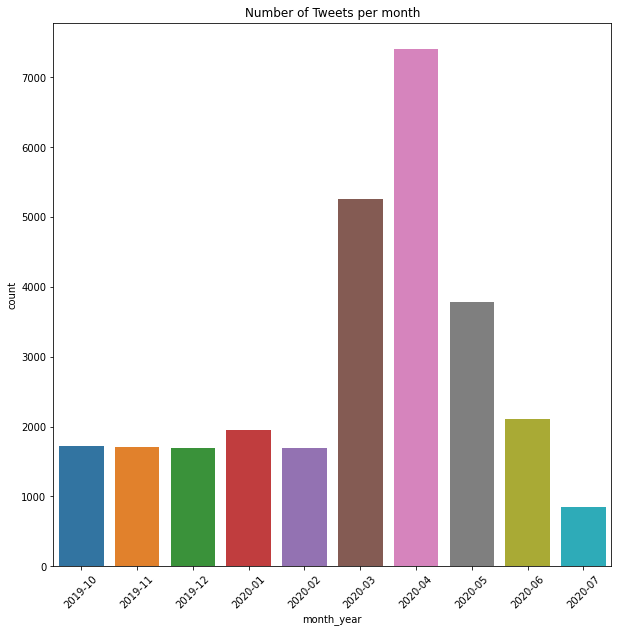

In [ ]:
# plot number of tweets everyday
fig = plt.figure(figsize = (10,10))
chart = sns.countplot(df['month_year'], order = sorted(df['month_year'].unique()))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Number of Tweets per month')

Text(0.5, 1.0, 'Number of Tweets per city')

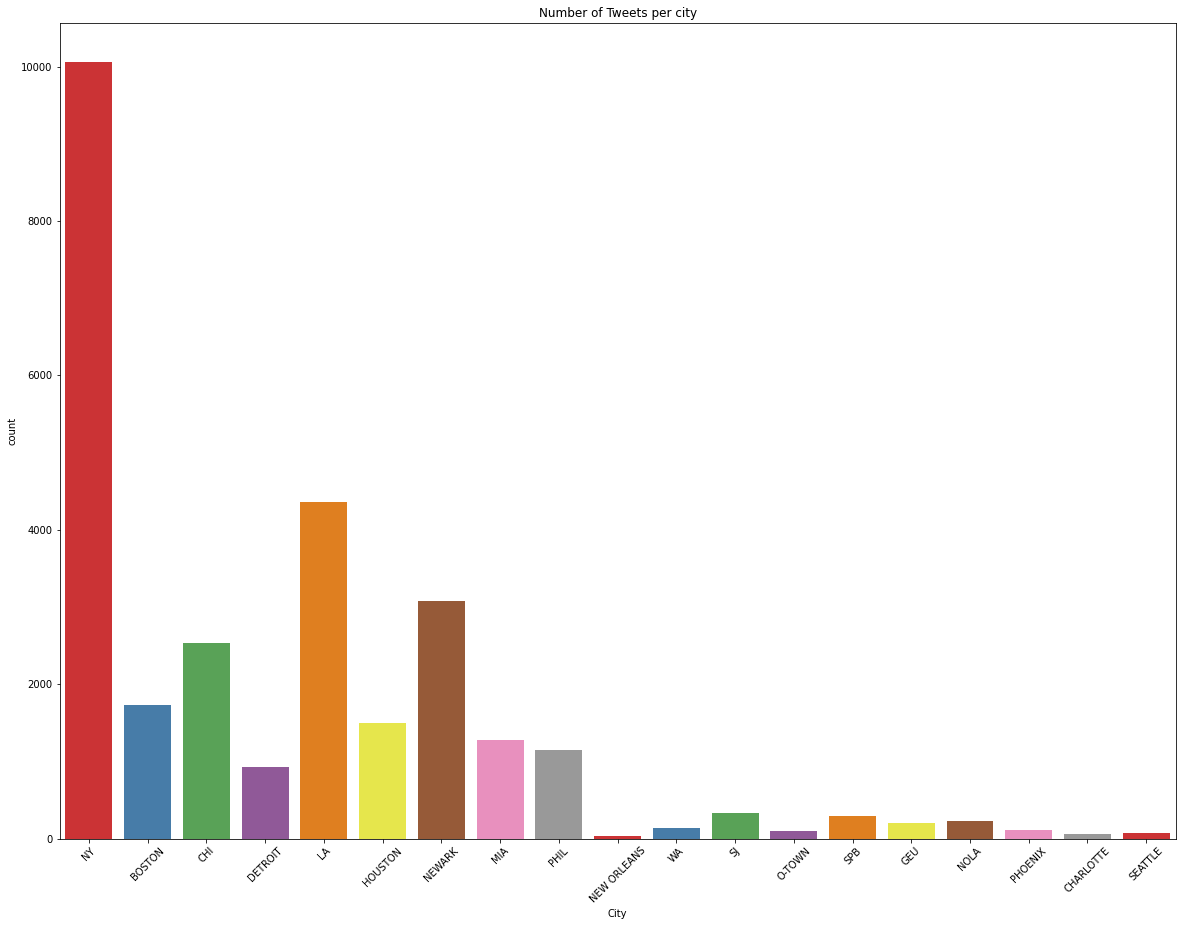

In [ ]:
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
chart=sns.countplot(df["City"],palette='Set1',ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Number of Tweets per city')

In [ ]:
df.head()

,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year,text_nlp
0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,2020-07,New Blog Post: True Connection
1,fvnclothing,What’s “scary” are the ppl who project their f...,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY,2020-07-07,16:34:08,2020-07,What’s “scary” are the ppl who project their f...
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY,2020-07-07,02:34:40,2020-07,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,0,0,#bebitoblog #fear #theseuncertaintimes,NY,2020-07-06,20:05:05,2020-07,Some thoughts on fear...
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,3,2,#UnitedWeCan #citizens #communities #country #...,NY,2020-06-30,12:05:40,2020-06,do what every we must for our and It’s o...


               Text                          ...                                
month_year  2019-10 2019-11 2019-12 2020-01  ... 2020-04 2020-05 2020-06 2020-07
City                                         ...                                
BOSTON           67      57      55      56  ...     656     233      81      28
CHARLOTTE         5       8       2       8  ...      11       7       3       0
CHI              99      85      70     122  ...     933     333      98      53
DETROIT          49      47      94      79  ...     253      83      77      23
GEU              29      29      20      18  ...      15      14      14      19
HOUSTON          90     103     150     130  ...     171     257     154      49
LA              397     428     375     544  ...     546     496     383     165
MIA             128     129     117     142  ...     121     158     134      45
NEW ORLEANS       5       1       5       1  ...       5       3       6       1
NEWARK          417     372 

Text(0.5, 1.0, 'Number of Tweets in Different Cities Groups across months')

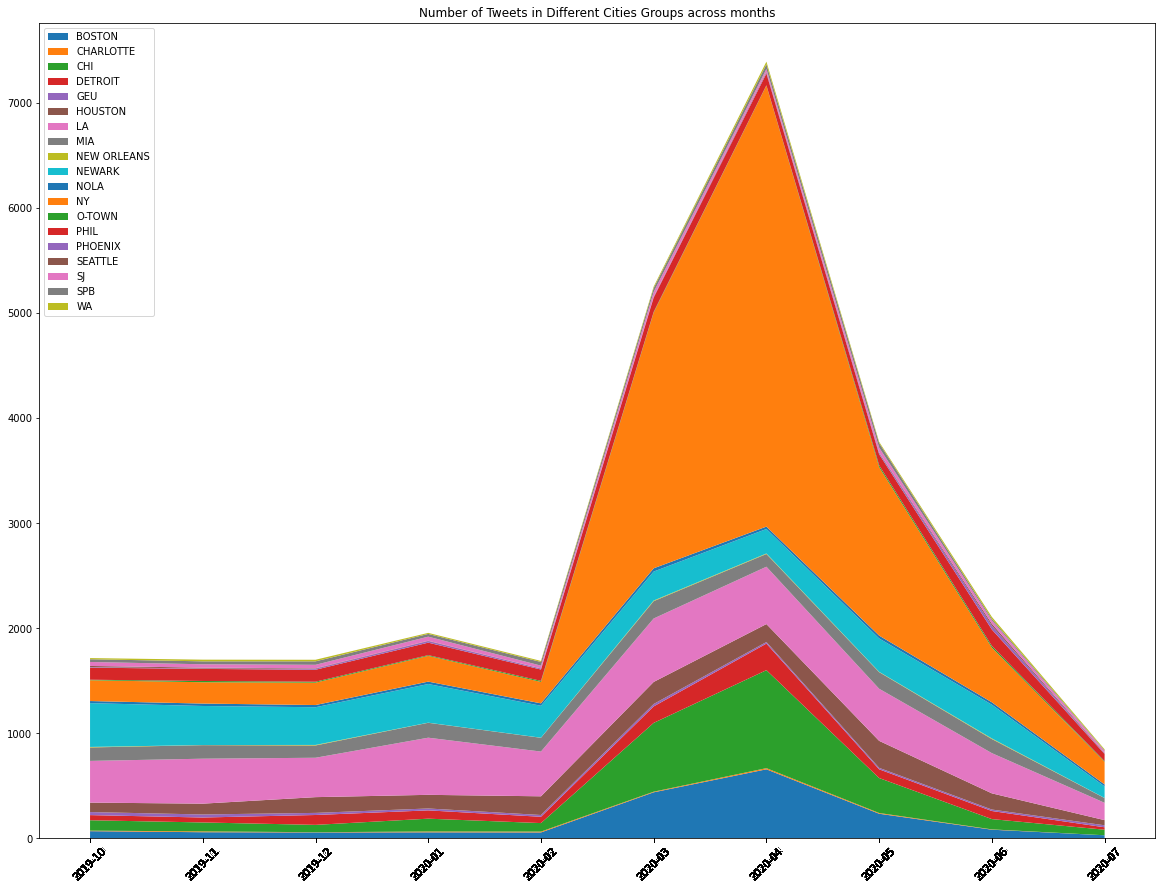

In [ ]:
# plot number of tweets everyday in each city 
pivot = pd.pivot_table(df, index=['City'],
                         columns=['month_year'],
                         values=['Text'], 
                         aggfunc = lambda x: len(x), 
                         fill_value=0)
print(pivot)
print(sorted(df['month_year'].unique()))

fig= plt.figure(figsize = (20,15))
plt.stackplot(sorted(df['month_year'].unique()), pivot.values, labels = pivot.index)
ax = plt.gca()
ax.set_xticks(sorted(df['month_year']))
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.title('Number of Tweets in Different Cities Groups across months')

In [ ]:
# extract data that doesn't contain NAs only
df = df[df['HashTags'].notna()]

# TEXT PREPROCESSING

In [ ]:
# get rid of all kinds of strange symbols from text
def preprocess(Text):
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0…)', ' ')  
    Text = Text.str.replace('(\n)', ' ')
    Text = Text.str.replace('+', '')
    return Text

# remove urls from text
def remove_urls(row):
    url_pattern = re.compile(r"https?://\S+|www\.\S+")
    row =  url_pattern.sub(r'', row)
    return row

# remove @accounts (@[A-Za-z0–9]+)|, emojis，#hashtags, com frin text
def removes(row):
    url_pattern = re.compile(r"(\w+:\/\/\S+)|(#(\w+))|(.twitter.com/[A-Za-z0–9]+)")
    row =  url_pattern.sub(r'', row)
    return row

In [ ]:
# apply all the preprocess functions
df['text_nlp'] = preprocess(df.Text)
df['text_nlp'] = df['text_nlp'].apply(remove_urls)
df['text_nlp'] = df['text_nlp'].apply(removes)

In [ ]:
# text before preprocessing
df.Text[5]

5    62 feels good. #reginaedelmanphoto #yoga #hand...
5    Damn they told Dave he gotta go home. He had f...
5    Crossing the #queensborobridge #sundayfunday w...
5    Hope I don’t end up “#missing” or on a tree ha...
5    What a couple of drama #queens only you leftis...
5    Believe what your heart tells you, not what ot...
5    Good thing he spent all that money, medicine a...
5    Dear #God, I thank you for being born to #Rosa...
5     GOING LIVE! 4PM-6PM TUNE IN TO @bedvynebrew f...
Name: Text, dtype: object

In [ ]:
# text after preprocessing
df.text_nlp[5]

5    62 feels good.                  @New York, New...
5    Damn they told Dave he gotta go home. He had f...
5    Crossing the   w the  after    3 hr  so much  ...
5    Hope I don’t end up “” or on a tree hanging by...
5    What a couple of drama  only you leftists sens...
5    Believe what your heart tells you, not what ot...
5    Good thing he spent all that money, medicine a...
5    Dear , I thank you for being born to  and , on...
5     GOING LIVE! 4PM-6PM TUNE IN TO @bedvynebrew f...
Name: text_nlp, dtype: object

In [ ]:
# Get the lenghth of text and word count
df['text_len'] = df.text_nlp.astype(str).apply(len)
df['word_count'] = df.text_nlp.apply(lambda x: len(str(x).split()))

In [ ]:
# Handling Abbreviation
def decontracted(phrase):
    phrase = re.sub(r"that\'s", "that is", phrase)   
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# decontracte words
df.text_nlp = df.text_nlp.apply(lambda x: decontracted(x).lower())

In [ ]:
# remove stop words
stop_words = stopwords.words('english')
not_stopwords = {}
common_words =['com','twitter','please',
               'the','would','could','can','may','must', 
              # 'us','i','you','this','we','me','that','it',
               'de','s','pic','t','m','en','la','que','don','re','e','el','ca']
stop_words.extend(word for word in common_words if word not in stop_words)
final_stop_words = set([word for word in stop_words if word not in not_stopwords])
df.text_nlp = df.text_nlp.apply(lambda x: ' '.join([word for word in x.split() if word not in final_stop_words]))

In [ ]:
# remove whitespace and punctuations
rm_punc = re.compile(r"(\W)")
rm_space = re.compile(r"(\s+)")
df.text_nlp = df.text_nlp.apply(lambda x: rm_punc.sub(' ', x))
df.text_nlp = df.text_nlp.apply(lambda x: rm_space.sub(' ', x))

In [ ]:
df.text_nlp[5]

5                      62 feels good new york new york
5             damn told dave gotta go home food eating
5    crossing w 3 hr much much time bridge without ...
5             hope don t end tree hanging posted this 
5    couple drama leftists sensed panic one else di...
5             believe heart tells you others tell you 
5    good thing spent money medicine time pretend h...
5                                     dear thank born 
5    going live 4pm 6pm tune bedvynebrew music djda...
Name: text_nlp, dtype: object

# **Sentiment Analysis**

In [ ]:
# get the polarity of each text
df['polarity'] = df.text_nlp.map(lambda text: TextBlob(text).sentiment.polarity)

# classify sentiment into positive and negative ones
df['sentiment'] = ''
df['sentiment'][df['polarity'] > 0] = 'positive'
df['sentiment'][df['polarity'] == 0] = 'neutral'
df['sentiment'][df['polarity'] < 0] = 'negative'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'distribution plot')

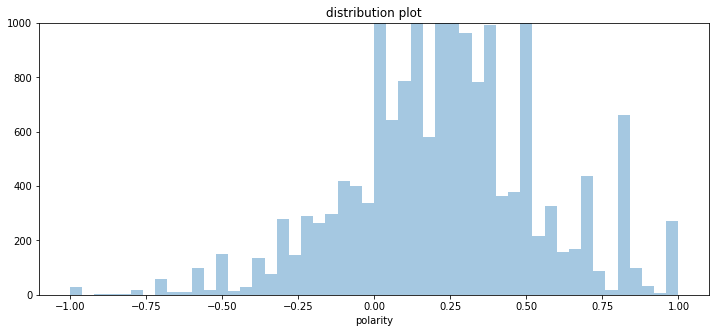

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.distplot(df['polarity'],kde = False)
plt.ylim(0, 1000)
plt.title("distribution plot")

In [ ]:
df[df['polarity']<-0.8]['Text']

19       There are 269,000 tons of plastic float in the...
115      Being alone isn’t the worst case scenario but ...
111      @LoriGrande3 #sadness that the world's biggest...
117      #Suicide is a devastating reality among health...
23       Make it so I don’t have to go to work, but the...
1108     U Ever Notice #DonaldTrump Would Rather Point ...
235      Cake batter in a mini jar - I think this has b...
1979     Speak up and ask for what you want. Worst case...
1980     Speak up and ask for what you want. Worst case...
359       #Played all #day #time to #sleep with my #fav...
289                          Disgusted. #stayhome #COVID19
906      Those moves are looking insane!!! Mr. Galo’s h...
1411     Therapy walk after another horrible night shif...
2623     I’m honestly disgusted by the actions of these...
3864     Just got a call from the doctor I work with......
4488     Watch out! I’m vicious with the sanitizing spr...
5357     If we lose 100,000 people that’s more than Kor.

In [ ]:
# Sentiment 
df.groupby('sentiment').Text.count()

sentiment
negative     3084
neutral     10928
positive    14118
Name: Text, dtype: int64

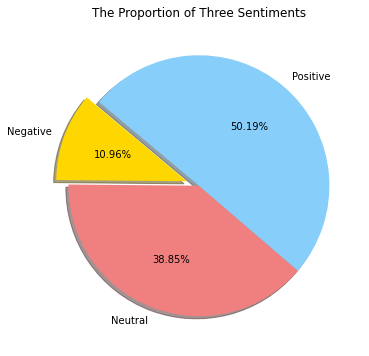

In [ ]:
# draw a pie chart to show the ratio of 'Negative', 'Neutral' and 'Positive' tweets
fig = plt.figure(figsize=(6,6))
labels = 'Negative', 'Neutral', 'Positive'
sizes = df.groupby('sentiment').Text.count().values
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('The Proportion of Three Sentiments')
plt.show()

Text(0.5, 1.0, 'Average sentiment of Tweets across Dates')

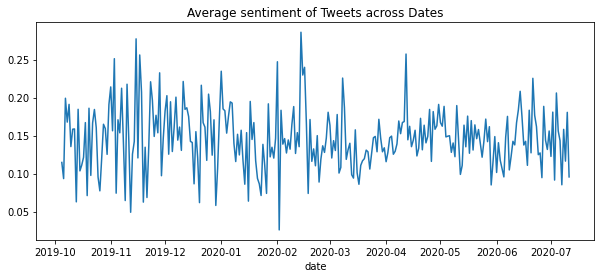

In [ ]:
# plot sentiment fluctuation with date
fig, ax1 = plt.subplots(figsize=(10,4))
df.groupby(['date']).mean()['polarity'].plot(kind = 'line')
plt.title('Average sentiment of Tweets across Dates')

# **Word Clouds**

In [ ]:
# Create word frequency count
num_words = 300
word2count = {}
for i in tqdm(range(len(df['text_nlp']))): 
    for word in df['text_nlp'].iloc[i].split():
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
            
freq_words = heapq.nlargest(num_words, word2count, key=word2count.get)

100%|██████████| 26427/26427 [00:00<00:00, 59638.34it/s]


In [ ]:
from PIL import Image
import requests
from io import BytesIO



In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from os import path, getcwd
from PIL import Image
d = getcwd()
response = requests.get("https://swissmacuser.ch/wp-content/uploads/2015/09/Twitter_logo_blue.png")
mask = np.array(Image.open(BytesIO(response.content)).convert("RGB"))
response=requests.get("https://previews.123rf.com/images/taiga/taiga1601/taiga160100031/51501178-blue-matrix-abstract-binary-code-digital-background-big-size.jpg")
color = np.array(Image.open(BytesIO(response.content)).convert("RGB"))

def func(arr):   
    if(arr[2]==0):
        return np.array([255,255,255],dtype="uint8")
    else:
        return arr

mask=np.apply_along_axis(func, 2, mask)
#color=np.apply_along_axis(func, 2, color)

In [ ]:
add_stopwords = ['day','like','go','one','today','let','get',
 '2', '1','3','4','5','take','make','think','want','way',
'see','still', 'via', 'now','much', 'even','watch','क',
 'all','really','thing', 'every','around','here','made',
 'also','part','total', 'things',  'little','getting',
 'last','essential','long', 'another', 'look', 'next','there',
 'people','time','new','thank','need','good','going','know',
 'week','everyone','live','love','right','home','us','stay','re',
'help', 'work', 'quarantine', 'life', 'keep', 'york', "york'", 'don']

# Add meaningless words into stopwords
for i in range(len(add_stopwords)):
    STOPWORDS.add(add_stopwords[i])

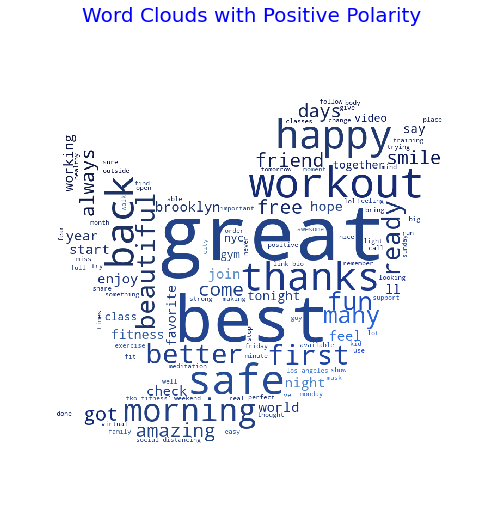

In [ ]:
wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white',stopwords=set(STOPWORDS),mask = mask)
wordcloud.generate(str(set(df['text_nlp'][df['sentiment'] == 'positive'])))
    # declare our figure  
image_colors = ImageColorGenerator(color)
plt.figure(figsize=(10,9))
plt.title("Word Clouds with Positive Polarity", fontsize=20,color='#0000FF')
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='None')
plt.axis('off')
plt.show()

In [ ]:
wordcloud.to_file('positive.png')

In [ ]:


response=requests.get("https://images.pexels.com/photos/960137/pexels-photo-960137.jpeg?cs=srgb&dl=red-wooden-surface-960137.jpg&fm=jpg")
red = np.array(Image.open(BytesIO(response.content)).convert("RGB"))
red=np.apply_along_axis(func, 2, red)

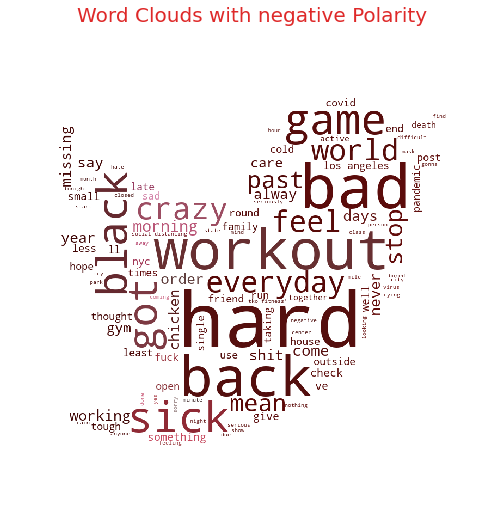

In [ ]:
wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white', stopwords=set(STOPWORDS),mask = mask)
wordcloud.generate(str(set(df['text_nlp'][df['sentiment'] == 'negative'])))
    # declare our figure  
image_colors = ImageColorGenerator(red)
plt.figure(figsize=(10,9))
plt.title("Word Clouds with negative Polarity", fontsize=20,color='#DE2929')
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='None')
plt.axis('off')
plt.show()

In [ ]:
wordcloud.to_file('negative.png')

# **Topic Modelling**


## preprocessing for Topic Modeling¶

In [ ]:
#Installing the libraries
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 3.3MB/s 
     |████████████████████████████████| 552kB 24.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=95101100a73518cf08b1c5b085c4019a86713d4739483021381b4ccd9d745b24
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=0cc7de895ae5fe8d2a20c8da3ca38bd63654ae4d5918a2ef65c18ae8833003f0
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
!pip install gensim --upgrade

     |████████████████████████████████| 24.2MB 141kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
'''import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()'''

openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2020-07-27 07:02:21--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.1’

mallet-2.0.8.zip.1  100%[===================>]  15.43M  17.1MB/s    in 0.9s    

2020-07-27 07:02:23 (17.1 MB/s) - ‘mallet-2.0.8.zip.1’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/stoplists/
  inflating: mallet-2.0.8/stoplists/en.txt  
   creating: __MACOSX/
   creating: __MACOSX/mallet-2.0.8/
   creating: __MACOSX/mallet-2.0.8/stoplists/
  inflating: __MACOSX/mallet-2.0.8/stoplists/._en.txt  
  inflating: mallet-2.0.8/stoplists/fr.txt  
  inflating: __MACOSX/mallet-2.0.8/stoplists/._fr.txt  
  inflating: mallet-2.0.8/stoplists/jp.txt  
  inflating: __MACOSX/mallet-2.0.8/stopl

In [ ]:
import os

In [ ]:
df.head()

,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year,text_nlp,text_len,word_count,polarity,sentiment
0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,2020-07,new blog post true connection,34,5,0.243182,positive
1,fvnclothing,What’s “scary” are the ppl who project their f...,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY,2020-07-07,16:34:08,2020-07,what s scary ppl project fears onto others don...,149,26,-0.550000,negative
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY,2020-07-07,02:34:40,2020-07,jɇɽɽɏ quiet mind able hear intuition fear run ...,118,21,0.193182,positive
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,0,0,#bebitoblog #fear #theseuncertaintimes,NY,2020-07-06,20:05:05,2020-07,thoughts fear,28,4,0.000000,neutral
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,3,2,#UnitedWeCan #citizens #communities #country #...,NY,2020-06-30,12:05:40,2020-06,every it s it s it s it s go mindful one anoth...,147,33,0.000000,neutral


In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
 #Topic modeling
# spacy for lemmatization
import spacy;
import en_core_web_sm
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
# tokenize each sentence into a list of words, removing punctuations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df['text_nlp']))

# Remove Stop and common Words
stopwords = nltk.corpus.stopwords.words('english')
# 'home', 'stay','new','york', 'time',
newStopWords =  ['s','t',  'm', 're','don','ve','2', '3', '1', 
                 'it', 'i', 'us', 'get', 'you', 'let', 'going', 'know', 
                'make', 'take', 'still','got', 'can', 'this', 'all', 'me','go',
                'even', 'here', 'well', 'much', 'many', 'way', 'want', 'every', 'little']
stopwords.extend(newStopWords)

data_words = [[word for word in doc if word not in stopwords] for doc in data_words]

In [ ]:
# restrict words to only noun, adjective, verb and adverb
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

## Finding the optimal number of topics using LdaMallet model

In [ ]:
start=24
limit=32
step=2
random = 155

In [ ]:
# Write the function to compute coherence values for each model. 
# This could help us choose how many topics should be included into our model.

def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word,random_seed=random)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# compute coherence values for each model
#mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

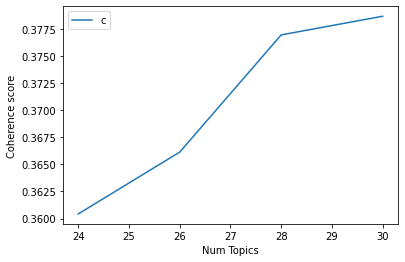

In [ ]:
# plot the coherence values when number of topics equals to different numbers
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
# The graph tell us about what number of topics to choose so we will choose 28 as it has maximum coherence score at that point

In [ ]:
# plot the coherence values when number of topics equals to different numbers
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

#If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out. This is exactly the case here.
#So for further steps I will choose the model with 28 topics itself.

Num Topics = 24  has Coherence Value of 0.3606
Num Topics = 26  has Coherence Value of 0.3743
Num Topics = 28  has Coherence Value of 0.3905
Num Topics = 30  has Coherence Value of 0.3758


## Finding Key Words for each topic using optimal LdaMallet model

In [ ]:
#mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, 
                                             corpus=corpus,
                                             num_topics=26, 
                                             id2word=id2word,
                                             random_seed = 155)

In [ ]:
# Show Topics
model_topics = ldamallet.show_topics(formatted=False)

pprint(sorted(ldamallet.print_topics(num_words=4)))


[(0, '0.171*"people" + 0.138*"life" + 0.046*"change" + 0.027*"die"'),
 (1, '0.098*"thing" + 0.087*"make" + 0.045*"end" + 0.024*"talk"'),
 (2, '0.048*"face" + 0.047*"social" + 0.047*"make" + 0.045*"wear"'),
 (4, '0.267*"time" + 0.085*"year" + 0.057*"follow" + 0.042*"post"'),
 (5, '0.215*"good" + 0.115*"morning" + 0.084*"fitness" + 0.034*"daily"'),
 (6, '0.059*"show" + 0.045*"long" + 0.037*"play" + 0.025*"read"'),
 (7, '0.068*"family" + 0.047*"friend" + 0.046*"positive" + 0.034*"death"'),
 (8, '0.084*"check" + 0.084*"night" + 0.065*"watch" + 0.060*"video"'),
 (9, '0.251*"work" + 0.087*"give" + 0.061*"hard" + 0.059*"smile"'),
 (12, '0.054*"friend" + 0.050*"listen" + 0.045*"big" + 0.025*"hand"'),
 (13, '0.053*"world" + 0.039*"place" + 0.036*"put" + 0.035*"remember"'),
 (14, '0.120*"live" + 0.079*"tonight" + 0.059*"pm" + 0.052*"join"'),
 (15, '0.045*"essential" + 0.044*"support" + 0.044*"care" + 0.044*"worker"'),
 (16, '0.069*"order" + 0.065*"free" + 0.050*"call" + 0.050*"open"'),
 (18, '0.

In [ ]:
topics = pd.DataFrame(sorted(ldamallet.print_topics(num_words=10)))
topics.columns = ['Topic_num','Key_words']
topics.to_csv('28_topics_2.csv',index = False)

In [ ]:
topics.head()
#This csv tell us about the keywords about each topic
'''
here in 0.171*"people" 
0.0171 is percentage score
and "people" is keyboard 
'''

,Topic_num,Key_words
0,0,"0.171*""people"" + 0.138*""life"" + 0.046*""change""..."
1,1,"0.098*""thing"" + 0.087*""make"" + 0.045*""end"" + 0..."
2,3,"0.056*""mind"" + 0.049*""bring"" + 0.033*""moment"" ..."
3,4,"0.267*""time"" + 0.085*""year"" + 0.057*""follow"" +..."
4,5,"0.215*""good"" + 0.115*""morning"" + 0.084*""fitnes..."


In [ ]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)
#More the coherence score more is better keywords


Coherence Score:  0.3742857750469968


## Topic vector

### Finding the dominant topic in each sentence
One of the practical application of topic modeling is to determine what topic a given document is about.

To find that, we find the topic number that has the highest percentage contribution in that document.

The format_topics_sentences() function below nicely aggregates this information in a presentable table.

In [ ]:
def format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=df["text_nlp"]):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = sent_topics_df.join(contents)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=df["text_nlp"])
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",new blog post true connection
1,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",oh reunion heyyy
2,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",couldn t accurate mls new home listing thanks ...
3,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",goldenrulewill via lovewillam_ atrainlive make...
4,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",hey maxwell meets premature end near future on...
5,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",power control life ___________________
6,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",life gives lemons
7,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",homemade cuban sandwiches strawberry daiquiris...
8,1,7.0,0.0681,"family, friend, positive, death, case, test, r...",what s scary ppl project fears onto others don...
9,1,7.0,0.0681,"family, friend, positive, death, case, test, r...",get winner i crying time find


In [ ]:
df_dominant_topic.head(100)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",new blog post true connection
1,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",oh reunion heyyy
2,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",couldn t accurate mls new home listing thanks ...
3,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",goldenrulewill via lovewillam_ atrainlive make...
4,0,4.0,0.0541,"time, year, follow, post, hour, step, turn, ag...",hey maxwell meets premature end near future on...
...,...,...,...,...,...
95,12,0.0,0.0385,"people, life, change, die, virus, save, kill, ...",the beacon theatre
96,12,0.0,0.0385,"people, life, change, die, virus, save, kill, ...",oh took south america
97,12,0.0,0.0385,"people, life, change, die, virus, save, kill, ...",people bot purchase nintendo consoles resell h...
98,12,0.0,0.0385,"people, life, change, die, virus, save, kill, ...",contagious disease people sitting homes unawar...


In [ ]:
df.to_csv('df_dominant_topic.csv') 
files.download('df_dominant_topic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Find the most representative document for each topic
Sometimes just the topic keywords may not be enough to make sense of what a topic is about. So, to help with understanding the topic, you can find the documents a given topic has contributed to the most and infer the topic by reading that document. Whew!!

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.1987,"people, life, change, die, virus, save, kill, ...",isolation outreach clinics full effect
1,1.0,0.1464,"thing, make, end, talk, person, quarantine, gr...",new sketch outside inside remember go outside
2,2.0,0.1672,"face, social, make, wear, weekend, mask, pract...",great weekend everyone need serious workout co...
3,3.0,0.1590,"mind, bring, moment, create, full, thought, dr...",share book saturday
4,4.0,0.1390,"time, year, follow, post, hour, step, turn, ag...",it s 7pm april 10th nightly clap essential wor...


In [ ]:
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.1987,"people, life, change, die, virus, save, kill, ...",isolation outreach clinics full effect
1,1.0,0.1464,"thing, make, end, talk, person, quarantine, gr...",new sketch outside inside remember go outside
2,2.0,0.1672,"face, social, make, wear, weekend, mask, pract...",great weekend everyone need serious workout co...
3,3.0,0.1590,"mind, bring, moment, create, full, thought, dr...",share book saturday
4,4.0,0.1390,"time, year, follow, post, hour, step, turn, ag...",it s 7pm april 10th nightly clap essential wor...
5,5.0,0.1673,"good, morning, fitness, daily, hit, yoga, memb...",NaN
6,6.0,0.1399,"show, long, play, read, lol, line, picture, bu...",inhale future exhale past
7,7.0,0.2360,"family, friend, positive, death, case, test, r...",working arrangement next youtube music video t...
8,8.0,0.1439,"check, night, watch, video, good, message, yes...",tonight outside lenoxhill heroes hear us makes...
9,9.0,0.1811,"work, give, hard, smile, happen, challenge, ma...",what s getting 60smusic 70smusic 80smusic


In [ ]:
df.to_csv('sent_topics_sorteddf_mallet.csv') 
files.download('sent_topics_sorteddf_mallet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The tabular output above actually has 25 rows, one each for a topic. It has the topic number, the keywords, and the most representative document. The Perc_Contribution column is nothing but the percentage contribution of the topic in the given document.

### Topic distribution across documents
Finally, we want to understand the volume and distribution of topics in order to judge how widely it was discussed. The below table exposes that information.

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

#Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']
df_dominant_topics=df_dominant_topics.drop_duplicates()
# Show
print(df_dominant_topics)


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,4.0,"time, year, follow, post, hour, step, turn, ag...",5932.0,0.1856
1.0,7.0,"family, friend, positive, death, case, test, r...",1268.0,0.0397
2.0,22.0,"stop, learn, start, real, fear, part, close, b...",1200.0,0.0375
3.0,3.0,"mind, bring, moment, create, full, thought, dr...",1339.0,0.0419
4.0,2.0,"face, social, make, wear, weekend, mask, pract...",1275.0,0.0399
5.0,20.0,"feel, back, leave, important, double, energy, ...",1156.0,0.0362
6.0,9.0,"work, give, hard, smile, happen, challenge, ma...",1124.0,0.0352
7.0,25.0,"workout, body, strong, goal, high, focus, buil...",1004.0,0.0314
8.0,7.0,"family, friend, positive, death, case, test, r...",1205.0,0.0377
9.0,15.0,"essential, support, care, worker, health, cont...",1231.0,0.0385


In [ ]:
df.to_csv('df_dominant_topics.csv') 
files.download('df_dominant_topics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Topic modelling analysis

In [ ]:
print(df_dominant_topic.shape)
print(df.shape)

(31969, 5)
(26427, 14)


In [ ]:
topic_names=sent_topics_sorteddf_mallet["Keywords"]

In [ ]:
topic_names=list(topic_names)

In [ ]:
print(topic_names)

['people, life, change, die, virus, save, kill, normal, sick, action', 'thing, make, end, talk, person, quarantine, grow, win, reason, light', 'face, social, make, wear, weekend, mask, practice, distancing, distance, park', 'mind, bring, moment, create, full, thought, dream, power, experience, find', 'time, year, follow, post, hour, step, turn, ago, spend, provide', 'good, morning, fitness, daily, hit, yoga, member, early, live, wake', 'show, long, play, read, lol, line, picture, buy, fall, store', 'family, friend, positive, death, case, test, rise, state, number, black', 'check, night, watch, video, good, message, yesterday, full, late, youtube', 'work, give, hard, smile, happen, challenge, man, pay, beat, tough', 'day, happy, start, enjoy, beautiful, birthday, celebrate, week, movement, begin', 'training, ready, gym, find, train, online, woman, personal, top, fun', 'friend, listen, big, hand, game, lose, head, repost, shoot, awareness', 'world, place, put, remember, hope, lot, story,

### Combining the topic names with or original dataset

In [ ]:
topics_docs = []
for m in ldamallet[corpus]:
    topics_docs.append(m)

train_vecs = []
for i in topics_docs:
    topic_vec = [j[1] for j in i]
    train_vecs.append(topic_vec) 

topic_dis = pd.DataFrame(train_vecs,columns=topic_names)
topic_dis.head()

df= df.join(topic_dis)
df.head(2)

,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year,text_nlp,text_len,word_count,polarity,sentiment,"people, life, change, die, virus, save, kill, normal, sick, action","thing, make, end, talk, person, quarantine, grow, win, reason, light","face, social, make, wear, weekend, mask, practice, distancing, distance, park","mind, bring, moment, create, full, thought, dream, power, experience, find","time, year, follow, post, hour, step, turn, ago, spend, provide","good, morning, fitness, daily, hit, yoga, member, early, live, wake","show, long, play, read, lol, line, picture, buy, fall, store","family, friend, positive, death, case, test, rise, state, number, black","check, night, watch, video, good, message, yesterday, full, late, youtube","work, give, hard, smile, happen, challenge, man, pay, beat, tough","day, happy, start, enjoy, beautiful, birthday, celebrate, week, movement, begin","training, ready, gym, find, train, online, woman, personal, top, fun","friend, listen, big, hand, game, lose, head, repost, shoot, awareness","world, place, put, remember, hope, lot, story, hear, forget, true","live, tonight, pm, join, meditation, share, music, word, favorite, tune","essential, support, care, worker, health, continue, fight, community, risk, business","order, free, call, open, food, sign, eye, studio, delivery, pick","love, great, guy, amazing, team, send, heart, job, nice, super","today, wait, book, link, bio, miss, session, tomorrow, visit, website","run, move, walk, eat, bad, easy, forward, mile, pretty, baby","feel, back, leave, important, double, energy, finally, tap, client, box","week, class, month, kid, virtual, join, dance, tomorrow, teach, photo","stop, learn, start, real, fear, part, close, break, school, share","set, exercise, minute, push, side, rest, leg, squat, schedule, info","stay, home, safe, healthy, fit, season, active, update, pray, inside","workout, body, strong, goal, high, focus, build, strength, add, level"
0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,2020-07,new blog post true connection,34,5,0.243182,positive,0.035613,0.035613,0.035613,0.035613,0.054131,0.03767,0.035613,0.035613,0.035613,0.03767,0.035613,0.035613,0.035613,0.054131,0.035613,0.035613,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613
0,_TraceDollFace_,Oh a reunion heyyy #Alone,0,0,#Alone,NY,2020-07-11,19:43:21,2020-07,oh reunion heyyy,19,4,0.000000,neutral,0.035613,0.035613,0.035613,0.035613,0.054131,0.03767,0.035613,0.035613,0.035613,0.03767,0.035613,0.035613,0.035613,0.054131,0.035613,0.035613,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613


In [ ]:
df.shape

(26427, 40)

In [ ]:
df.to_csv('df.csv') 
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Finding polarity of all 25 topics

In [ ]:

topic_list = df.columns[14:39]
topic_mean = df.iloc[:,14:39].mean().values

for i in range(len(topic_list)):
    df[i] = np.where(df[topic_list[i]] > 0.08,1,0)
    
topic_polarity = list()
for i in range(25):
    topic_polarity.append(df[df[i]==1]['polarity'].mean())
    
topic_polarity = pd.DataFrame({'Topics':topic_list,'Polarity':topic_polarity})
topic_polarity=topic_polarity.sort_values(by = ['Polarity'],ascending=False)
topic_polarity.head()

,Topics,Polarity
9,"work, give, hard, smile, happen, challenge, ma...",0.168467
19,"run, move, walk, eat, bad, easy, forward, mile...",0.168011
3,"mind, bring, moment, create, full, thought, dr...",0.159847
14,"live, tonight, pm, join, meditation, share, mu...",0.159484
13,"world, place, put, remember, hope, lot, story,...",0.157494


In [ ]:
from google.colab import files
df.to_csv('topic_polarity.csv') 
files.download('topic_polarity.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Notebook created by **Archit Bansal**  
*contact me:*
 * [Github](https://github.com/j-a-r-v-i )  
 * [linkedin](www.linkedin.com/in/archit-bansal-3248b0162)  

 Really grateful to **Aradhana** who helped me to complete my work  
 
